## Loading Data


In [3]:
import pandas as pd
#loads in the movie data 
imdb_moviedata= pd.read_csv('IMDb movies.csv', low_memory=False)
# prints out the first 5 movie entries
imdb_moviedata.head(10)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,NaN,NaN,NaN,NaN,13.0,5.0
6,tt0002423,Madame DuBarry,Madame DuBarry,1919,1919-11-26,"Biography, Drama, Romance",85,Germany,German,Ernst Lubitsch,...,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...","The story of Madame DuBarry, the mistress of L...",6.8,753,NaN,NaN,NaN,NaN,12.0,9.0
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,...,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,NaN,NaN,NaN,7.0,5.0
8,tt0002452,Independenta Romaniei,Independenta Romaniei,1912,1912-09-01,"History, War",120,Romania,NaN,"Aristide Demetriade, Grigore Brezeanu",...,"Aristide Demetriade, Constanta Demetriade, Con...",The movie depicts the Romanian War of Independ...,6.7,198,ROL 400000,NaN,NaN,NaN,4.0,1.0
9,tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane",...,"Robert Gemp, Frederick Warde, Albert Gardner, ...",Richard of Gloucester uses manipulation and mu...,5.5,225,$ 30000,NaN,NaN,NaN,8.0,1.0


## German Genre Votes Analysis

In [4]:
german_movies = imdb_moviedata[imdb_moviedata['country'] == 'Germany']
german_movies.shape

(1396, 22)

In [5]:
#function ensures to give decade for the movies
def get_decade(row):
    try:
        year = row['year']
        century = year[:2]
        decade = str(int(year[2:]) // 10) + '0'
        full_decade = century + decade
        return full_decade
    except:
        print('Year:', year)
        print('Century:', century)

In [6]:
%%capture
#create decade column
german_movies['decade'] = german_movies.apply(lambda row: get_decade(row=row), axis=1)

In [7]:
#create function for genre
def get_first_genre(row):
    return row['genre'].split(',')[0]

In [8]:
%%capture
german_movies['first_genre'] = german_movies.apply(lambda row: get_first_genre(row=row), axis=1)

In [130]:
#added column for decade
pd.DataFrame(german_movies.groupby(['decade','first_genre', 'country'])['avg_vote'].mean())


avg_vote
decade first_genre country          
1910   Adventure   Germany  6.600000
       Biography   Germany  6.800000
       Comedy      Germany  6.550000
       Crime       Germany  7.000000
       Drama       Germany  6.083333
...                              ...
2020   Biography   Germany  6.300000
       Comedy      Germany  5.142857
       Drama       Germany  6.700000
       Musical     Germany  6.600000
       Mystery     Germany  5.600000

[78 rows x 1 columns]

In [131]:
#avg vote for germany
pd.DataFrame(german_movies.groupby(['first_genre', 'country'])['avg_vote'].mean())

,,avg_vote
first_genre,country,
Action,Germany,5.064865
Adventure,Germany,5.823944
Animation,Germany,5.350000
Biography,Germany,6.583871
Comedy,Germany,5.825000
Crime,Germany,6.263077
Drama,Germany,6.329263
Family,Germany,5.661538
Fantasy,Germany,6.100000


In [10]:
german_movies['first_genre'].nunique()

18

In [11]:
#setup for data visualization seaborn
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [63]:
votes_country_decade = pd.DataFrame(german_movies.groupby(['country', 'decade'])['avg_vote'].mean()).reset_index()


In [65]:
# Pivoted needed to create heatmap avg vote, country, decade
pivoted = votes_country_decade.pivot("country", "decade", "avg_vote")
pivoted

decade,1910,1920,1930,1940,1990,2000,2010,2020
country,,,,,,,,
Germany,6.422222,6.902899,6.714583,6.641935,5.82987,5.85875,5.746988,5.726667


In [67]:
#Pivoted needed to create heatmap avg vote, country, decade
pivoted_italy=votes_country_decade3.pivot("country", "decade", "avg_vote")
pivoted_italy

decade,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
country,,,,,,,,,,,,
Italy,6.466667,6.566667,6.755556,6.816,6.722222,6.066148,5.93033,5.574185,5.693802,5.768405,5.567679,5.442857


Text(0.5, 1.0, 'AVG_votes for movies in Germany per decade')

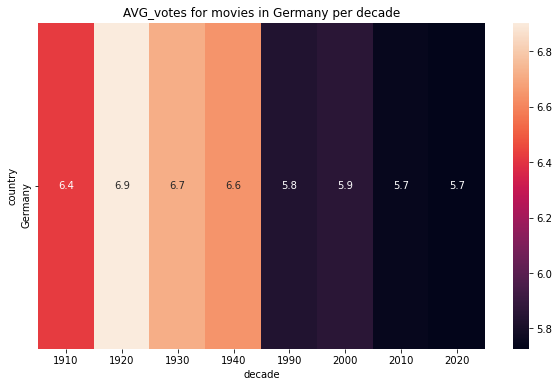

In [123]:
#Heatmap showing Average of German Movies, by decade
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivoted, annot=True)
plt.title("AVG_votes for movies in Germany per decade")

Text(0.5, 1.0, 'AVG_votes for movies in Italy per decade')

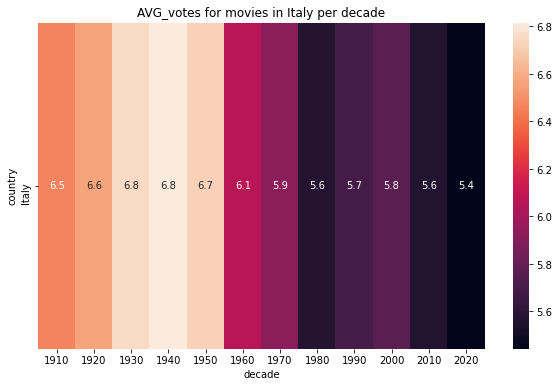

In [122]:
#Heatmap showing Average of Italian Movies, by decade
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivoted_italy, annot=True)
plt.title("AVG_votes for movies in Italy per decade")


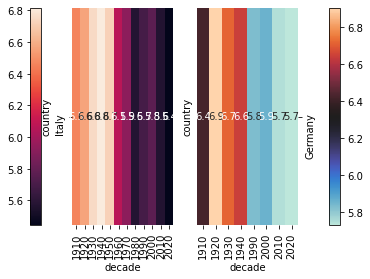

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [127]:
#create a heatmap with two heatmaps next to each other

import matplotlib.pyplot as plt

votes_country_decade = pd.DataFrame(german_movies.groupby(['country', 'decade'])['avg_vote'].mean()).reset_index()
votes_country_decade3=pd.DataFrame(italian_movies.groupby(['country', 'decade'])['avg_vote'].mean()).reset_index()

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.15)



sns.heatmap(data=pivoted_italy, annot=True, cmap="rocket", ax =ax1, cbar=False)
fig.colorbar(ax1.collections[0], ax=ax1, location="left", use_gridspec=False, pad=0.2)
 

sns.heatmap(data=pivoted, annot=True,cmap="icefire", ax=ax2, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2, location="right", use_gridspec=False, pad=0.2)


ax2.yaxis.tick_right()
ax2.tick_params(rotation=90)
plt.show()
plt.figure(figsize=(10, 6))

## Add German Movie Count

In [15]:
#Overall all counts of Genres
german_movies['first_genre'].value_counts()

Comedy       520
Drama        475
Action        74
Adventure     71
Crime         65
Horror        55
Biography     31
Animation     28
Thriller      26
Family        13
Fantasy       12
Mystery        8
Western        5
Sci-Fi         5
Romance        4
Music          2
Musical        1
History        1
Name: first_genre, dtype: int64

In [16]:
#get the movie count for germany with grouby 
movies_genre_decade = pd.DataFrame(german_movies.groupby(['first_genre', 'decade'])['avg_vote'].size()).reset_index()

In [17]:
#rename from avg_vote to movie_count
movies_genre_decade.rename(columns={'avg_vote': 'movie_count'}, inplace=True)

In [18]:
movies_genre_decade

,first_genre,decade,movie_count
0,Action,1920,1
1,Action,1940,1
2,Action,1990,11
3,Action,2000,24
4,Action,2010,37
...,...,...,...
73,Thriller,1990,7
74,Thriller,2000,6
75,Thriller,2010,12
76,Western,1930,1


In [19]:
%%capture
# avg vote, country, decade
pivoted2 = movies_genre_decade.pivot("first_genre", "decade", "movie_count")
pivoted2 = pivoted2.reset_index()

# Create extra columns for missing decades
missing_decades = ['19'+str(i) for i in [50, 60, 70, 80]]
for d in missing_decades:
    pivoted2[d] = pd.Series()

# Sort columns
cols_sorted = list(pivoted2.columns)
cols_sorted.sort()
cols_sorted

pivoted2 = pivoted2[cols_sorted]

In [20]:
#Set the index with sorted values to ensure the missing columns came in the middle instead of the end
pivoted2 = pivoted2.set_index('first_genre')

Text(0.5, 1.0, 'Germany movies per Genre and decade')

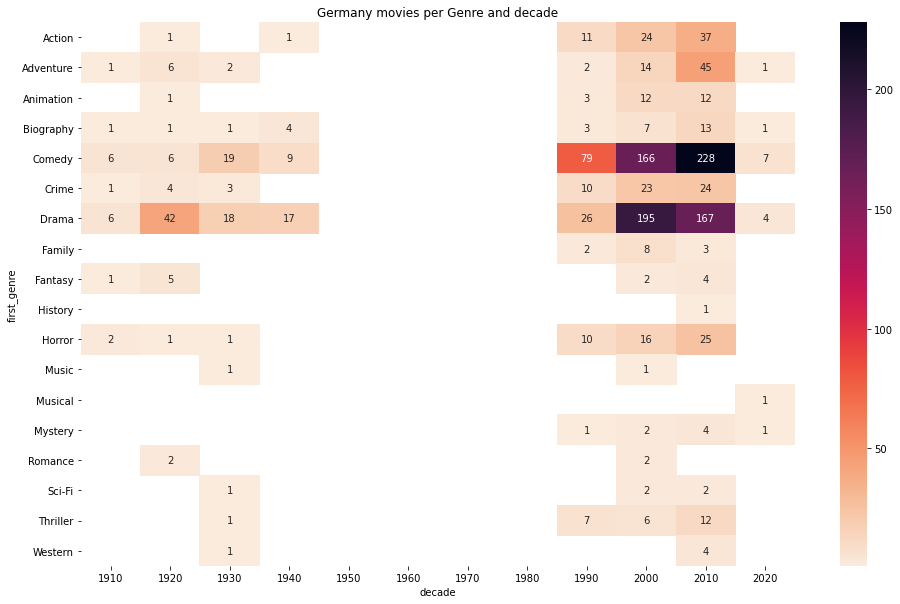

In [59]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=pivoted2, annot=True, fmt='g', cmap=sns.cm.rocket_r)
plt.title("Germany movies per Genre and decade")

## USA Votes

In [137]:
#USA movie criteria
usa_movies = imdb_moviedata[imdb_moviedata['country'] == 'USA']

In [138]:
# print(usa_movies)

In [139]:
#gives the amount of USA data in the data set
usa_movies.shape

(28511, 22)

In [140]:
# Data cleaning
# usa_movies[usa_movies['year'] == 'TV Movie 2019']
usa_movies.at[83917, 'year'] = '2019'

In [141]:
%%capture
#set the decade column for usa movies
usa_movies['decade'] = usa_movies.apply(lambda row: get_decade(row=row), axis=1)

In [142]:
%%capture
#get first genre for usa movies
usa_movies['first_genre'] = usa_movies.apply(lambda row: get_first_genre(row=row), axis=1)

In [143]:
#Usa movie data for genre and avg votes
pd.DataFrame(usa_movies.groupby(['first_genre', 'country'])['avg_vote'].mean())

,,avg_vote
first_genre,country,
Action,USA,5.238008
Adventure,USA,5.742574
Animation,USA,6.252336
Biography,USA,6.573633
Comedy,USA,5.691874
Crime,USA,5.902416
Documentary,USA,7.500000
Drama,USA,5.897411
Family,USA,5.064286


In [144]:
#get the movie count with grouby for usa
movies_genre_decade2 = pd.DataFrame(usa_movies.groupby(['first_genre', 'decade'])['avg_vote'].size()).reset_index()

In [145]:
#rename from avg_vote to movie_count
movies_genre_decade2.rename(columns={'avg_vote': 'movie_count'}, inplace=True)

In [146]:
movies_genre_decade2

,first_genre,decade,movie_count
0,Action,1910,7
1,Action,1920,32
2,Action,1930,257
3,Action,1940,300
4,Action,1950,278
...,...,...,...
206,Western,1980,4
207,Western,1990,8
208,Western,2000,14
209,Western,2010,30


In [40]:
# avg vote, country, decade
pivoted3 = movies_genre_decade2.pivot("first_genre", "decade", "movie_count")
pivoted3 = pivoted3.reset_index()

In [42]:
#Set the index
pivoted3 = pivoted3.set_index('first_genre')

Text(0.5, 1.0, 'USA count for movies by Genre and decade')

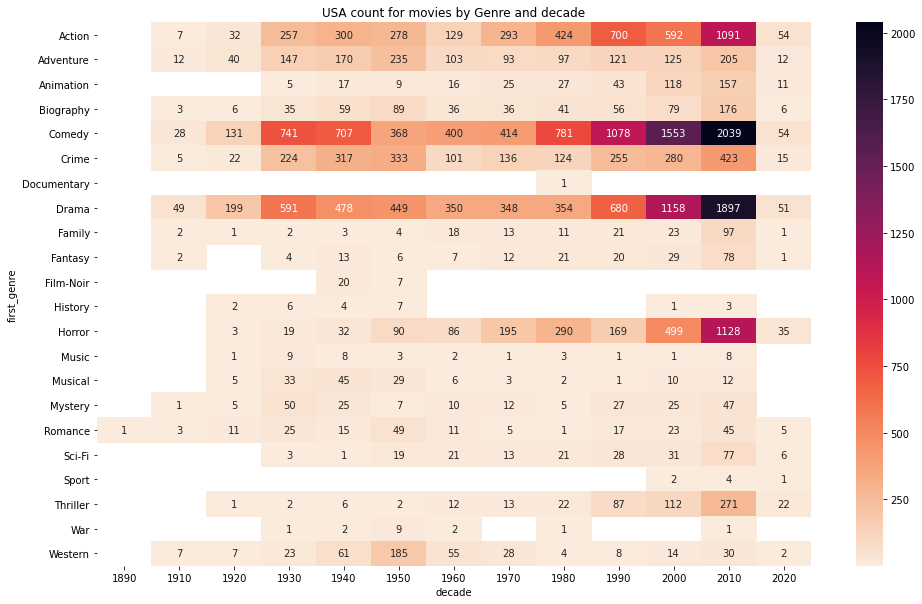

In [61]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=pivoted3, annot=True, fmt='g', cmap=sns.cm.rocket_r)
plt.title("USA count for movies by Genre and decade")

## Italian Votes

In [47]:
#Italian movie criteria
italian_movies = imdb_moviedata[imdb_moviedata['country'] == 'Italy']

In [48]:
italian_movies.shape

(2444, 22)

In [49]:
%%capture
#set the decade column for Italian movies
italian_movies['decade'] = italian_movies.apply(lambda row: get_decade(row=row), axis=1)

In [50]:
%%capture
#get first genre for Italian movies
italian_movies['first_genre'] = italian_movies.apply(lambda row: get_first_genre(row=row), axis=1)

In [147]:
#Italian movie data for genre and avg votes
pd.DataFrame(italian_movies.groupby(['decade','first_genre', 'country'])['avg_vote'].mean())

avg_vote
decade first_genre country          
1910   Adventure   Italy    6.520000
       Crime       Italy    6.500000
       Drama       Italy    6.560000
       Fantasy     Italy    5.700000
1920   Action      Italy    6.700000
...                              ...
2010   Thriller    Italy    5.350000
       War         Italy    3.400000
2020   Biography   Italy    5.750000
       Comedy      Italy    5.155556
       Drama       Italy    6.100000

[114 rows x 1 columns]

In [149]:
#Italian movie data for genre and avg votes
pd.DataFrame(italian_movies.groupby(['first_genre', 'country'])['avg_vote'].mean())

,,avg_vote
first_genre,country,
Action,Italy,5.344503
Adventure,Italy,5.375641
Animation,Italy,5.966667
Biography,Italy,6.492683
Comedy,Italy,5.894667
Crime,Italy,6.309286
Drama,Italy,6.089432
Family,Italy,6.400000
Fantasy,Italy,5.270000


In [52]:
#get the movie count with grouby for Italian
movies_genre_decade3 = pd.DataFrame(italian_movies.groupby(['first_genre', 'decade'])['avg_vote'].size()).reset_index()

In [53]:
#rename from avg_vote to movie_count
movies_genre_decade3.rename(columns={'avg_vote': 'movie_count'}, inplace=True)

In [54]:
movies_genre_decade3

,first_genre,decade,movie_count
0,Action,1920,1
1,Action,1940,2
2,Action,1950,2
3,Action,1960,33
4,Action,1970,61
...,...,...,...
109,War,1990,1
110,War,2010,1
111,Western,1960,32
112,Western,1970,18


In [150]:
# avg vote, country, decade
pivoted4 = movies_genre_decade3.pivot("first_genre", "decade", "movie_count")
pivoted4 = pivoted4.reset_index()

In [151]:
#Set the index 
pivoted4 = pivoted4.set_index('first_genre')

Text(0.5, 1.0, 'Italy count of movies per genre and decade')

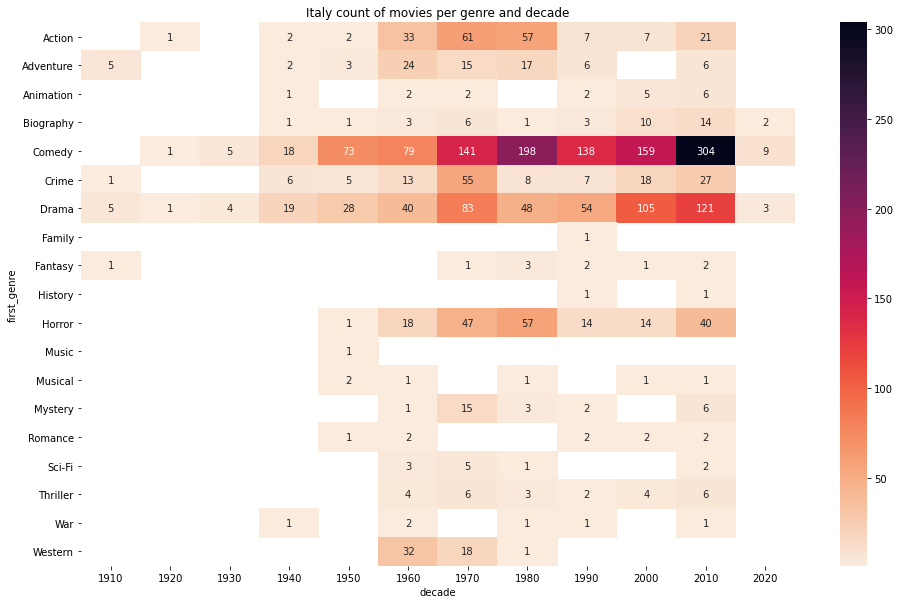

In [152]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=pivoted4, annot=True, fmt='g', cmap=sns.cm.rocket_r)
plt.title("Italy count of movies per genre and decade")

## Basic Arithmetic

In [19]:
imdb_moviedata.shape

(85855, 22)

In [20]:
#getting the average vote for movies
mean_vote= imdb_moviedata['avg_vote'].mean()
print(mean_vote)

5.898655873274613


In [21]:
#indicates imdb avg is 5.89 out of 10
#reviews from user versus critics
critic_reviews=imdb_moviedata['reviews_from_critics']
print(critic_reviews)

0         2.0
1         7.0
2         2.0
3         3.0
4        14.0
         ... 
85850     4.0
85851     4.0
85852     NaN
85853     NaN
85854     2.0
Name: reviews_from_critics, Length: 85855, dtype: float64


In [22]:
#reviews from user
user_reviews=imdb_moviedata['reviews_from_critics']
print(critic_reviews)


0         2.0
1         7.0
2         2.0
3         3.0
4        14.0
         ... 
85850     4.0
85851     4.0
85852     NaN
85853     NaN
85854     2.0
Name: reviews_from_critics, Length: 85855, dtype: float64


In [6]:
#setting the prediction target 
#y=imdb_moviedata.original_title

In [23]:
imdb_moviedata['reviews_from_users']

0         1.0
1         7.0
2         5.0
3        25.0
4        31.0
         ... 
85850     NaN
85851     6.0
85852     NaN
85853     NaN
85854     NaN
Name: reviews_from_users, Length: 85855, dtype: float64

## Setting Features for the data

In [24]:
imdb_moviedata.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [38]:
#setting the imdb features import in the data
imdb_features=['original_title','country','genre','director','actors','avg_vote','reviews_from_users', 'reviews_from_critics', 'date_published']
X= imdb_moviedata[imdb_features]

In [39]:
X.describe()

,avg_vote,reviews_from_users,reviews_from_critics
count,85855.000000,78258.000000,74058.000000
mean,5.898656,46.040826,27.479989
std,1.234987,178.511411,58.339158
min,1.000000,1.000000,1.000000
25%,5.200000,4.000000,3.000000
50%,6.100000,9.000000,8.000000
75%,6.800000,27.000000,23.000000
max,9.900000,10472.000000,999.000000


In [40]:
#Shows the first 5 entries of the imdb features
X.head(10)

,original_title,country,genre,director,actors,avg_vote,reviews_from_users,reviews_from_critics,date_published
0,Miss Jerry,USA,Romance,Alexander Black,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,1.0,2.0,1894-10-09
1,The Story of the Kelly Gang,Australia,"Biography, Crime, Drama",Charles Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,7.0,7.0,1906-12-26
2,Den sorte drøm,"Germany, Denmark",Drama,Urban Gad,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",5.8,5.0,2.0,1911-08-19
3,Cleopatra,USA,"Drama, History",Charles L. Gaskill,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",5.2,25.0,3.0,1912-11-13
4,L'Inferno,Italy,"Adventure, Drama, Fantasy","Francesco Bertolini, Adolfo Padovan","Salvatore Papa, Arturo Pirovano, Giuseppe de L...",7.0,31.0,14.0,1911-03-06
5,"From the Manger to the Cross; or, Jesus of Naz...",USA,"Biography, Drama",Sidney Olcott,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...",5.7,13.0,5.0,1913
6,Madame DuBarry,Germany,"Biography, Drama, Romance",Ernst Lubitsch,"Pola Negri, Emil Jannings, Harry Liedtke, Edua...",6.8,12.0,9.0,1919-11-26
7,Quo Vadis?,Italy,"Drama, History",Enrico Guazzoni,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...",6.2,7.0,5.0,1913-03-01
8,Independenta Romaniei,Romania,"History, War","Aristide Demetriade, Grigore Brezeanu","Aristide Demetriade, Constanta Demetriade, Con...",6.7,4.0,1.0,1912-09-01
9,Richard III,"France, USA",Drama,"André Calmettes, James Keane","Robert Gemp, Frederick Warde, Albert Gardner, ...",5.5,8.0,1.0,1912-10-15


In [28]:
#shows the last 10 entries
X.tail(10)

,original_title,genre,director,actors,avg_vote,reviews_from_users,reviews_from_critics,date_published
85845,La reina de los lagartos,Fantasy,"Juan González, Nando Martínez","Javier Botet, Bruna Cusí, Miki Esparbé, Ivan L...",4.8,NaN,5.0,2019-10-05
85846,Enemy Lines,War,Anders Banke,"Ed Westwick, John Hannah, Tom Wisdom, Corey Jo...",5.0,29.0,6.0,2020-05-04
85847,Ottam,Drama,Zam,"Nandu Anand, Roshan Ullas, Manikandan R. Achar...",7.4,1.0,NaN,2019-03-08
85848,Pengalila,Drama,T.V. Chandran,"Lal, Akshara Kishor, Iniya, Narain, Renji Pani...",8.8,NaN,NaN,2019-03-08
85849,Manoharam,"Comedy, Drama",Anvar Sadik,"Vineeth Sreenivasan, Aparna Das, Basil Joseph,...",6.8,9.0,1.0,2019-09-27
85850,Le lion,Comedy,Ludovic Colbeau-Justin,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",5.3,NaN,4.0,2020-01-29
85851,De Beentjes van Sint-Hildegard,"Comedy, Drama",Johan Nijenhuis,"Herman Finkers, Johanna ter Steege, Leonie ter...",7.7,6.0,4.0,2020-02-13
85852,Padmavyuhathile Abhimanyu,Drama,Vineesh Aaradya,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",7.9,NaN,NaN,2019-03-08
85853,Sokagin Çocuklari,"Drama, Family",Ahmet Faik Akinci,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",6.4,NaN,NaN,2019-03-15
85854,La vida sense la Sara Amat,Drama,Laura Jou,"Maria Morera Colomer, Biel Rossell Pelfort, Is...",6.7,NaN,2.0,2020-02-05


In [29]:
X['genre'].value_counts()

Drama                       12543
Comedy                       7693
Comedy, Drama                4039
Drama, Romance               3455
Comedy, Romance              2508
                            ...  
Crime, Mystery, Horror          1
Family, Romance, Sci-Fi         1
Sci-Fi, Horror, Thriller        1
Action, Musical                 1
Drama, Sport, Western           1
Name: genre, Length: 1257, dtype: int64

## Get date published data

In [30]:
X.info()
#Used to figure out each element in the data set and its datatype
X.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        85855 non-null  object 
 1   genre                 85855 non-null  object 
 2   director              85768 non-null  object 
 3   actors                85786 non-null  object 
 4   avg_vote              85855 non-null  float64
 5   reviews_from_users    78258 non-null  float64
 6   reviews_from_critics  74058 non-null  float64
 7   date_published        85855 non-null  object 
dtypes: float64(3), object(5)
memory usage: 5.2+ MB


original_title           object
genre                    object
director                 object
actors                   object
avg_vote                float64
reviews_from_users      float64
reviews_from_critics    float64
date_published           object
dtype: object

## Get unique genres

In [31]:
# Lists unique values from genre column
unique_genres_in_col = list(X['genre'].unique())

# For every elem in list, split by comma
unique_genres_in_col = [element.split(',') for element in unique_genres_in_col]

# Flattening list of lists
flat_list = [item for sublist in unique_genres_in_col for item in sublist]

# Strip whitespaces
flat_list = [element.strip() for element in flat_list]

# Get unique genres
unique_genres = set(flat_list)

Get unique Actors

In [32]:
X['actors'].value_counts()

Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Kaneta Kimotsuki, Kazuya Tatekabe                                                                                                                                                                            9
Sergey A.                                                                                                                                                                                                                                                6
Bill Corbett, Kevin Murphy, Michael J. Nelson                                                                                                                                                                                                            6
Keiji Fujiwara, Satomi Kôrogi, Miki Narahashi, Akiko Yajima                                                                                                                                                                                            

In [33]:
#identifies how many data values are missing
missing_values_count=imdb_moviedata.isnull().sum()
missing_values_count[:45]

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [34]:
#unique movie titles
X.original_title.unique()
#unique movie titles value counts
X.original_title.value_counts()

Anna                           10
Wanted                          8
Home                            8
Inferno                         8
The Three Musketeers            8
                               ..
Hilda Crane                     1
Vuonna 85                       1
Moon ching sap dai huk ying     1
Haie und kleine Fische          1
Una semana solos                1
Name: original_title, Length: 80852, dtype: int64

In [35]:
#Get the count of movie title by group by function
X.groupby('original_title').original_title.count()

original_title
"Giliap"                 1
"Swing it" magistern     1
#73, Shaanthi Nivaasa    1
#Captured                1
#Followme                1
                        ..
Üç sevgili               1
Üçüncü Sayfa             1
Þorsti                   1
Þrestir                  1
ärtico                   1
Name: original_title, Length: 80852, dtype: int64

In [36]:
#counts of movie genre with grouby function
X.groupby('genre').genre.count()

genre
Action                          715
Action, Adventure               200
Action, Adventure, Biography     31
Action, Adventure, Comedy       606
Action, Adventure, Crime        229
                               ... 
Western, Comedy                   6
Western, Comedy, Drama            1
Western, Drama                    3
Western, Family                   1
Western, Horror                   1
Name: genre, Length: 1257, dtype: int64

In [41]:
#group by country
X.groupby(['country', 'genre']).apply(lambda df: df.loc[df.avg_vote.idxmax()])

original_title  \
country                                        genre                                                         
Afghanistan, France                            Drama                                      Khakestar-o-khak   
Afghanistan, France, Germany, UK               Drama, War                Syngué sabour, pierre de patience   
Afghanistan, Iran                              Drama                                    Rona, Madar-e Azim   
                                               Drama, Romance                    Chand metre moka'ab eshgh   
Afghanistan, Ireland, Japan, Iran, Netherlands Drama                                                 Osama   
...                                                                                                    ...   
Yugoslavia, West Germany                       Action, Biography, Drama                  Banovic Strahinja   
                                               Comedy, Drama, Fantasy           W.R. - Misterije organizma   
                                               Drama, Romance               I Bog stvori kafansku pevacicu   
Zambia, Sweden                                 Drama                                        Gräset sjunger   
Zimbabwe                                       Comedy, Romance                                    Cook Off   

                                                                                                                country  \
country                                        genre                                                                      
Afghanistan, France                            Drama                                                Afghanistan, France   
Afghanistan, France, Germany, UK               Drama, War                              Afghanistan, France, Germany, UK   
Afghanistan, Iran                              Drama                                                  Afghanistan, Iran   
                                               Drama, Romance                                         Afghanistan, Iran   
Afghanistan, Ireland, Japan, Iran, Netherlands Drama                     Afghanistan, Ireland, Japan, Iran, Netherlands   
...                                                                                                                 ...   
Yugoslavia, West Germany                       Action, Biography, Drama                        Yugoslavia, West Germany   
                                               Comedy, Drama, Fantasy                          Yugoslavia, West Germany   
                                               Drama, Romance                                  Yugoslavia, West Germany   
Zambia, Sweden                                 Drama                                                     Zambia, Sweden   
Zimbabwe                                       Comedy, Romance                                                 Zimbabwe   

                                                                                            genre  \
country                                        genre                                                
Afghanistan, France                            Drama                                        Drama   
Afghanistan, France, Germany, UK               Drama, War                              Drama, War   
Afghanistan, Iran                              Drama                                        Drama   
                                               Drama, Romance                      Drama, Romance   
Afghanistan, Ireland, Japan, Iran, Netherlands Drama                                        Drama   
...                                                                                           ...   
Yugoslavia, West Germany                       Action, Biography, Drama  Action, Biography, Drama   
                                               Comedy, Drama, Fantasy      Comedy, Drama, Fantasy   
                                               Dram

In [122]:
#statistical review of dataset
#Multi index
genre_reviewed= X.groupby(['original_title', 'genre', 'avg_vote']).avg_vote.agg([len])
genre_reviewed
#X.groupby(['genre']).avg_vote([len, min, max])

,,,len
original_title,genre,avg_vote,
"""Giliap""","Crime, Drama",6.5,1.0
"""Swing it"" magistern","Comedy, Music",6.1,1.0
"#73, Shaanthi Nivaasa","Drama, Family, Musical",7.1,1.0
#Captured,Thriller,5.0,1.0
#Followme,"Horror, Thriller",3.5,1.0
...,...,...,...
Üç sevgili,"Comedy, Romance",5.7,1.0
Üçüncü Sayfa,Drama,7.4,1.0
Þorsti,"Comedy, Horror",6.8,1.0


In [118]:
mi=genre_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

## Sorting


In [123]:
genre_reviewed= genre_reviewed.reset_index()
#genre_reviewed.sort_values(by='len')
#change to descending order
genre_reviewed.sort_values(by='len', ascending= False)

,original_title,genre,avg_vote,len
84312,Yilanlarin Öcü,Drama,7.6,2.0
28848,Heaven Sent,"Drama, Fantasy",5.4,2.0
12563,Charlie Charlie,Horror,2.4,2.0
6751,Back Street,Drama,6.8,2.0
50260,Ningen no jôken,"Drama, History, War",8.5,2.0
...,...,...,...,...
28613,Haunting on Fraternity Row,"Horror, Mystery, Thriller",3.9,1.0
28612,Haunting of the Innocent,"Horror, Thriller",2.3,1.0
28611,Haunter,"Fantasy, Horror, Mystery",5.9,1.0
28610,HauntedWeen,"Comedy, Horror",5.1,1.0


In [125]:
#sorting by avgvote and len
genre_reviewed.sort_values(by=['avg_vote', 'len'])

,original_title,genre,avg_vote,len
2090,A no dentou,Drama,1.0,1.0
6922,Badang,"Action, Comedy, Fantasy",1.0,1.0
6987,"Bai bai, marâno",Drama,1.0,1.0
13282,Chun jie xin ling: Zhu meng yan yi quan,"Comedy, Drama",1.0,1.0
15096,Cumali Ceber: Allah Seni Alsin,Comedy,1.0,1.0
...,...,...,...,...
20677,Ek,"Action, Drama",9.8,1.0
34072,Jeeudo,"Drama, Romance",9.8,1.0
41373,Lejos de Casa pelicula Venezolana,"Drama, History",9.8,1.0
50901,Notuku Potu,"Horror, Mystery",9.8,1.0


## Identify Missing Values

In [71]:
#remove data with one missing value
subset_imdb_moviedata=imdb_moviedata.loc[:,'genre':'avg_vote'].head()
subset_imdb_moviedata

,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote
0,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9
1,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1
2,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8
3,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2
4,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0


In [74]:
#replace Na with None
subset_imdb_moviedata.fillna('None')

#how much data did we lose?
#print("Columns in orginal dataset: %d \n" % imdb_moviedata.shape[1])
#print("Columns with missing values dropped: %d" % columns_with_missing_data_dropped.shape[1])

,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote
0,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9
1,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1
2,Drama,53,"Germany, Denmark",None,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8
3,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2
4,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0


In [28]:
unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [29]:
len(flat_list)

3495

## Data Visualization

In [69]:
#setup for data visualization seaborn
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


<AxesSubplot:>

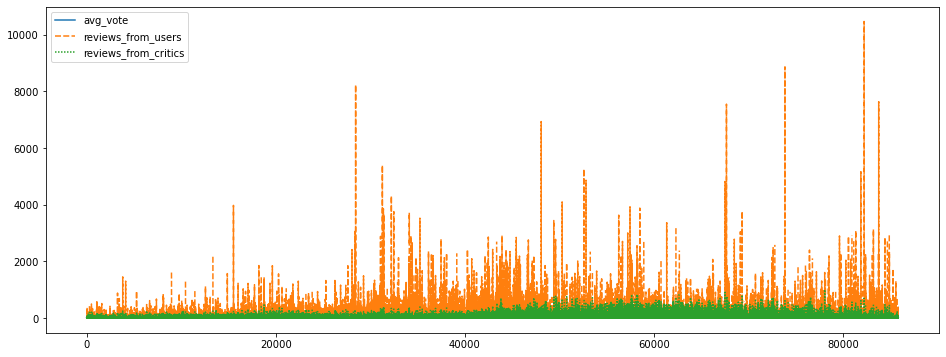

In [70]:
#set width and height of line graph
plt.figure(figsize=(16,6))
#Shows the avg_vote, user_reviews and critics reviews
#How do I manipulate to show it between Genre and avg vote
sns.lineplot(data=X)

<AxesSubplot:>

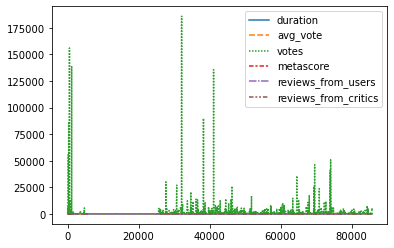

In [71]:
#Germany line plot
sns.lineplot(data=german_movies)

In [72]:
#shows which columns are used in the list
list(german_movies.columns)

['imdb_title_id',
 'title',
 'original_title',
 'year',
 'date_published',
 'genre',
 'duration',
 'country',
 'language',
 'director',
 'writer',
 'production_company',
 'actors',
 'description',
 'avg_vote',
 'votes',
 'budget',
 'usa_gross_income',
 'worlwide_gross_income',
 'metascore',
 'reviews_from_users',
 'reviews_from_critics',
 'first_genre',
 'decade']

In [73]:
list(X.columns)

['original_title',
 'country',
 'genre',
 'director',
 'actors',
 'avg_vote',
 'reviews_from_users',
 'reviews_from_critics',
 'date_published']

<AxesSubplot:title={'center':'German Avg votes by Genre type'}, ylabel='decade'>

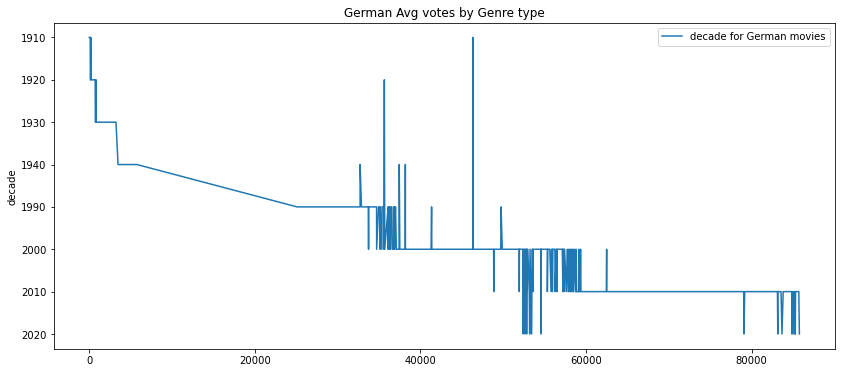

In [84]:
plt.figure(figsize=(14,6))
#Add Title
plt.title("German Avg votes by Genre type")
#create plot that shows how many votes are done in the decade
sns.lineplot(data=german_movies['decade'], label="decade for German movies")

<AxesSubplot:ylabel='avg_vote'>

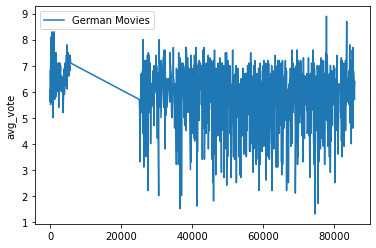

In [136]:
#German Avg_vote Distribution
sns.lineplot(data=german_movies['avg_vote'], label="German Movies")